In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [3]:
df_train = pd.read_csv("sign_mnist_train.csv")
df_test = pd.read_csv("sign_mnist_test.csv")

<Axes: xlabel='label', ylabel='count'>

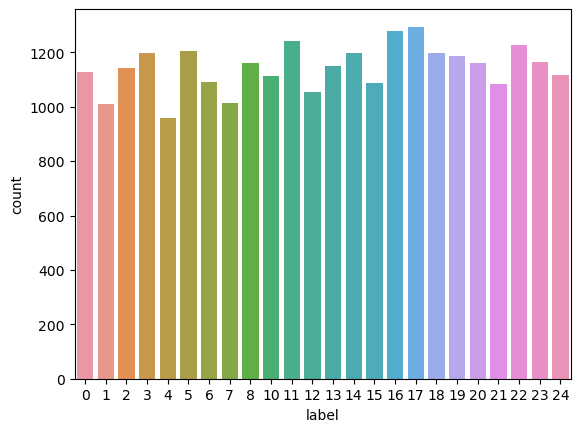

In [57]:
plt.figure()
sns.countplot(data=df_train, x="label")

In [58]:
X_train = df_train.drop(["label"], axis=1).values
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train / 255.0

In [59]:
X_test = df_test.drop(["label"], axis=1).values
X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test / 255.0

In [60]:
y_train = df_train["label"]

In [61]:
y_test = df_test["label"]

In [62]:
X_train.shape, X_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [63]:
y_train.shape, y_test.shape

((27455,), (7172,))

In [64]:
labels = y_train.unique().tolist().sort()

In [66]:
lb = LabelBinarizer().fit(y_train)
y_train_binarized = lb.transform(y_train)
y_test_binarized = lb.transform(y_test)

In [71]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    
    Flatten(),
    
    Dense(512, activation="relu"),
    Dense(24, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 512)              

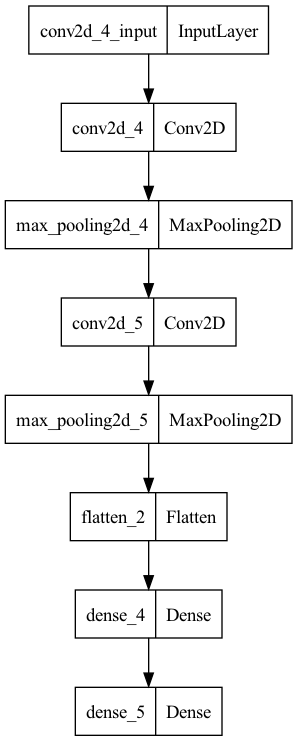

In [73]:
plot_model(model)

In [74]:
history = model.fit(X_train, y_train_binarized, validation_split=0.2, batch_size=128, epochs=25)

Epoch 1/25
172/172 [==============================] - 4s 20ms/step - loss: 1.5083 - accuracy: 0.5745 - val_loss: 0.4455 - val_accuracy: 0.8856
Epoch 2/25
172/172 [==============================] - 3s 20ms/step - loss: 0.2546 - accuracy: 0.9385 - val_loss: 0.1072 - val_accuracy: 0.9812
Epoch 3/25
172/172 [==============================] - 3s 20ms/step - loss: 0.0565 - accuracy: 0.9943 - val_loss: 0.0283 - val_accuracy: 0.9982
Epoch 4/25
172/172 [==============================] - 3s 20ms/step - loss: 0.0171 - accuracy: 0.9996 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 5/25
172/172 [==============================] - 3s 20ms/step - loss: 0.0077 - accuracy: 0.9999 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 6/25
172/172 [==============================] - 3s 20ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/25
172/172 [==============================] - 3s 20ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000

In [75]:
model.evaluate(X_test, y_test_binarized)

225/225 [==============================] - 1s 4ms/step - loss: 0.4586 - accuracy: 0.9239


[0.4586011469364166, 0.9238706231117249]

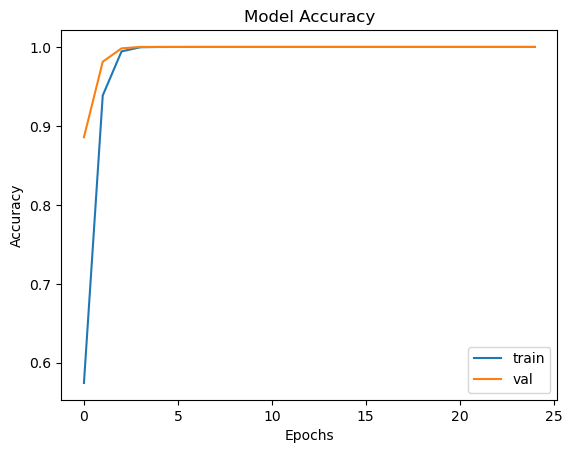

In [76]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

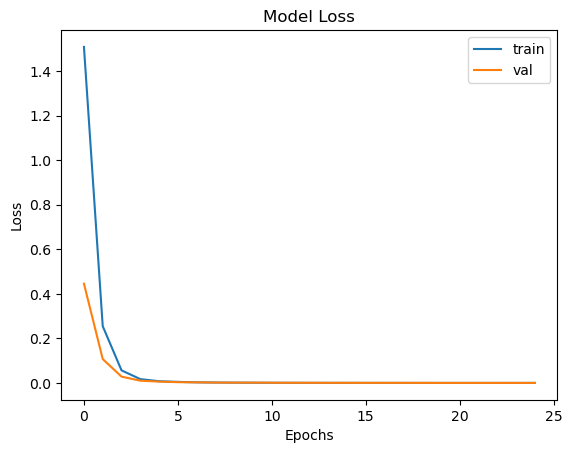

In [77]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [85]:
rand_idx = np.random.randint(0, 7172)

In [86]:
image = X_test[rand_idx]
label = y_test[rand_idx]

In [87]:
preds = model.predict(np.expand_dims(image, axis=0))

1/1 [==============================] - 0s 18ms/step


In [88]:
predicted_class = np.argmax(preds)

In [89]:
print("Predicted: ", predicted_class)
print("Actual: ", label)

Predicted:  6
Actual:  6


In [97]:
count = 0
for i in range(100):
    rand_idx = np.random.randint(0, 7172)
    image = X_test[rand_idx]
    label = y_test[rand_idx]
    preds = model.predict(np.expand_dims(image, axis=0), verbose=0)
    predicted_class = np.argmax(preds)
    if predicted_class == label:
        count += 1
        
print(count, "%")

53 %


In [ ]:
model.save("SignModel.h5")